# 利用Opencv读取曲线大致想法
见markdown

## 1.导入相关库

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 2.灰度化

size of pic is: (223, 360)


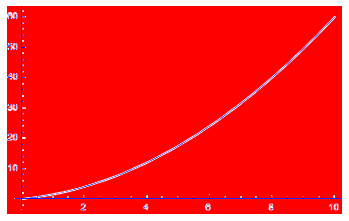

In [12]:
pic=cv.imread('demo.png') #读取图片
gray_pic=cv.cvtColor(pic,cv.COLOR_BGR2GRAY) #灰度化
gray_pic=np.array(gray_pic) #数组化
print('size of pic is:',gray_pic.shape) #图片大小 
plt.imshow(gray_pic,cmap='bwr') #散点热力图
plt.axis("off")
plt.show()

## 3.二值化

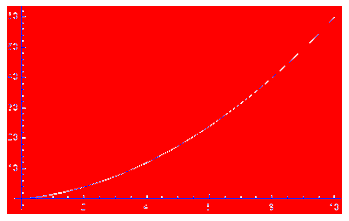

In [13]:
retval,binary_pic=cv.threshold(gray_pic,127,255,cv.THRESH_BINARY) #二值化
binary_pic=np.array(binary_pic) #数组化
plt.imshow(binary_pic,cmap='bwr') #散点热力图
plt.axis("off")
plt.show()

## 4.提取点

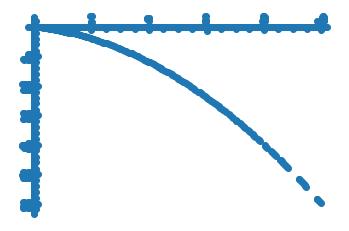

In [14]:
x=list()
y=list()
M,N=binary_pic.shape
for j in range(M):
    for i in range(N):
        if binary_pic[j][i]==0:
            x.append(i)
            y.append(j)
            pass
        pass
    pass
xi=np.array(x)
yj=np.array(y)
plt.scatter(xi,yj)
plt.axis('off')
plt.show()

## 5.定义(i,j)到(x,y)的转换方式

In [15]:
def Trans(ij,xy):
    i1,j1,i2,j2,i3,j3=ij
    x1,y1,x2,y2,x3,y3=xy
    A=np.array([
        [i1,j1,1],
        [i2,j2,1],
        [i3,j3,1]
    ])
    invA=np.linalg.inv(A)
    q11,q21,x0=invA.dot(np.array([x1,x2,x3]))
    q12,q22,y0=invA.dot(np.array([y1,y2,y3]))
    q=np.array([
        [q11,q21],
        [q12,q22]
    ])
    xy0=np.array([[x0],[y0]])
    return q,xy0
    pass

## 6.观察匹配：

- (15,206)->(0,0)
- (351,206)->(10,0)
- (15,11)->(0,60)

In [16]:
demo_ij=np.array([15,206,351,206,15,11])
demo_xy=np.array([0,0,10,0,0,60])
demo_q,demo_xy0=Trans(demo_ij,demo_xy)
print('q=\n',demo_q,'\n')
print('xy0=\n',demo_xy0,'\n')

q=
 [[ 0.0297619   0.        ]
 [ 0.         -0.30769231]] 

xy0=
 [[-0.44642857]
 [63.38461538]] 



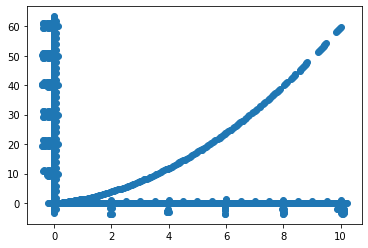

In [17]:
xiyj=np.c_[xi,yj]
xiyj=xiyj.T
xy=demo_q.dot(xiyj)+demo_xy0
plt.scatter(xy[0],xy[1])

## 7.范围抠取，筛选信息

考虑：

f1=x

f2=x+x*x

来勾勒这个图形

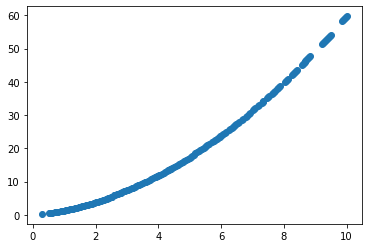

In [18]:
def f1(t):
    return t
    pass
def f2(t):
    return t+t**2
    pass
filter_x=list()
filter_y=list()
for i in range(xy[0].size):
    if f1(xy[0][i])<xy[1][i]<f2(xy[0][i]):
        filter_x.append(xy[0][i])
        filter_y.append(xy[1][i])
        pass
    pass
filter_x=np.array(filter_x)
filter_y=np.array(filter_y)
plt.scatter(filter_x,filter_y)
plt.show()

## 8.排序与去重

In [19]:
def sort2(x,y):
    N=x.size
    for i in range(N):
        for j in range(1,N-i):
            if x[j]<x[j-1]:
                x[j-1],x[j]=x[j],x[j-1]
                y[j-1],y[j]=y[j],y[j-1]
                pass
            else:
                pass
            pass
        pass
    pass

def dup2(x,y):
    xd=list()
    yd=list()
    N=x.size
    for i in range(N):
        item=x[i]
        if item in xd:
            continue
        else:
            tmp=list()
            for j in range(i,N):
                if item==x[j]:
                    tmp.append(y[j])
                    pass
                pass
            tmp=np.array(tmp)
            xd.append(item)
            yd.append(np.mean(tmp))
            pass
        pass
    xd=np.array(xd)
    yd=np.array(yd)
    return xd,yd
    pass

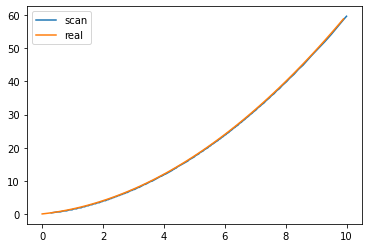

In [21]:
sort2(filter_x,filter_y)
xx,yy=dup2(filter_x,filter_y)
plt.plot(xx,yy,label='scan')
xx=np.arange(0,10,0.1)
yy=xx+xx*xx/2
plt.plot(xx,yy,label='real')
plt.legend()
plt.show()

In [22]:
xx

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])